## Part 1

In [1]:
# Activation function: convert values between 0 and 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp = np.exp(x)
    return exp/np.sum(exp, axis = 0, keepdims = True)

(60000, 784)
5000
5000
training_loss
0.9311050610537707


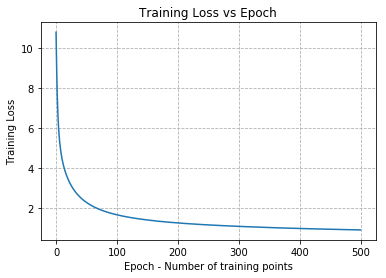

training_accuracy
0.7018


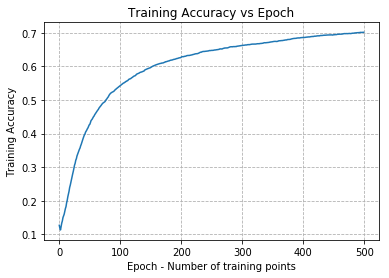

validation_loss
1.1042454961389967


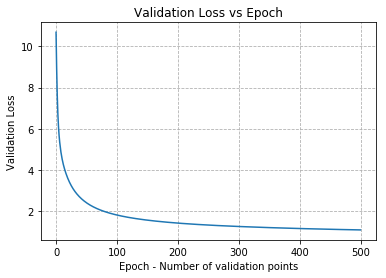

validation_accuracy
0.6626


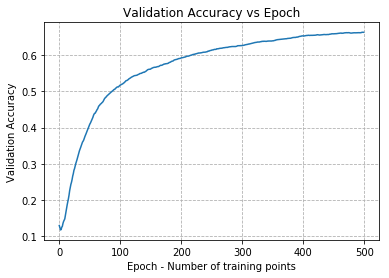

Confusion Matrix
[[314   9  10  39   7   2  70   0   6   0]
 [ 10 500   5  19  11   2   3   1   3   2]
 [ 10   3 285   5  92   6  83   0  18   2]
 [ 28  21  10 397  18   2  17   1   6   1]
 [  4   2  78  24 291   1  81   0   7   0]
 [  2   4  10   3   2 337   9  66  23  37]
 [ 89   8 106  25 106   4 134   0  19   2]
 [  0   1   0   1   0  54   0 410   8  38]
 [  4   2  15   7   4  27  18   9 401   3]
 [  1   1   2   1   0  19   5  31   6 440]]
epoch iteration
5000


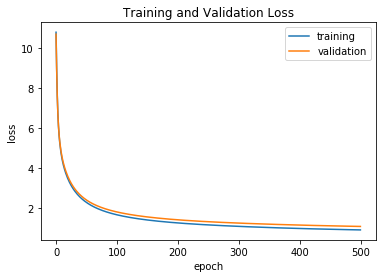

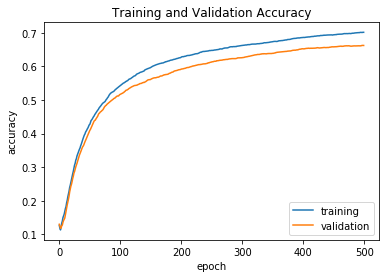

KeyboardInterrupt: 

In [6]:
# Import required files and read MNIST dataset
import util_mnist_reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

np.set_printoptions(suppress=True)

# Read the data
x_training, y_training = util_mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

# Normalize data
x_training = x_training/255
x_test = x_test/255

# Split data
(x_validation, x_test) = x_test[5000:], x_test[:5000] 
(y_validation, y_test) = y_test[5000:], y_test[:5000]

print(x_training.shape)

total_x_training = x_training
total_y_training = y_training
# total_x_validation = x_test
# total_y_validation = y_test
total_x_validation = x_validation
total_y_validation = y_validation

# Creating batches
training_batch_size = int(x_training.shape[0]/12)
validation_batch_size = int(x_test.shape[0]/1)
print(training_batch_size)
print(validation_batch_size)
# break

# Initialization
iteration = 0
epochs = 500
number_of_hidden_nodes = 128
number_of_classes = 10
learning_rate = 0.09
probability_threshold = 0.5

total_training_loss = []
total_validation_loss = []
total_training_accuracy = []
total_validation_accuracy = []


# Batch implementation
while iteration < len(total_x_training):
    x_training = total_x_training[iteration:iteration+training_batch_size]
    y_training = total_y_training[iteration:iteration+training_batch_size]
    
    x_validation = total_x_validation
    y_validation = total_y_validation
    
    x_training = x_training.T
    x_validation = x_validation.T
    m = x_training.shape[1]
    
    if(iteration == 0): # initilaize/reset weights and biase only during the first iteration - question?
#     if(True): # initilaize/reset weights and biase for each iteration
        w_1 = np.random.normal(0, 1, [(x_training.shape[0]), number_of_hidden_nodes]) # random weights
        w_2 = np.random.normal(0, 1, [number_of_hidden_nodes, number_of_classes]) # random weights
#         w_1 = np.zeros((x_training.shape[0],number_of_hidden_nodes)) # zero weights
#         w_2 = np.zeros((number_of_hidden_nodes,number_of_classes)) # zero weights
#         biase_1 = np.zeros((number_of_hidden_nodes,x_training.shape[1]))
#         biase_2 = np.zeros((number_of_classes,x_training.shape[1]))
        biase_1 = 0
        biase_2 = 0
        

    # convert training result into 2d format
    initial_y_training = y_training
    result_y_training = np.zeros(shape=(x_training.shape[1], 10))
    for index_1,output_training in enumerate(y_training):
        for index in range(0, number_of_classes):
            if(index == output_training):
                result_y_training[index_1][index] = 1
    y_training = result_y_training
    y_training = y_training.T
    
    # convert validation result into 2d format
    initial_y_validation = y_validation
    result_y_validation = np.zeros(shape=(x_validation.shape[1], 10))
    for index_1,output_validation in enumerate(y_validation):
        for index in range(0, number_of_classes):
            if(index == output_validation):
                result_y_validation[index_1][index] = 1
    y_validation = result_y_validation
    y_validation = y_validation.T

    # Iterate for required epochs
    for epoch in range(epochs):
        # Training calculations
        z_training_1 = np.dot(w_1.T, x_training) + biase_1
        a_training_1 = sigmoid(z_training_1)
        z_training_2 = np.dot(w_2.T, a_training_1) + biase_2
        a_training_2 = softmax(z_training_2)
        training_loss = -1/m*(np.sum(y_training*np.log(a_training_2)))
        # print('training_loss')
        # print(training_loss)
        total_training_loss.append(np.squeeze(training_loss))
        training_accuracy = metrics.accuracy_score(initial_y_training, np.argmax(a_training_2.T, axis=1))
        total_training_accuracy.append(training_accuracy)
        
        # Calculate validation only after the last iteration - question?
        # if((iteration + training_batch_size) == len(total_x_training)):
        if(True):
            #Validation calculations
            z_validation_1 = np.dot(w_1.T, x_validation) + biase_1
            a_validation_1 = sigmoid(z_validation_1)

            z_validation_2 = np.dot(w_2.T, a_validation_1) + biase_2
            a_validation_2 = softmax(z_validation_2)
            
            validation_loss = -1/m*(np.sum(y_validation*np.log(a_validation_2)))
            # print('validation_loss')
            # print(validation_loss)
            total_validation_loss.append(np.squeeze(validation_loss))
            validation_accuracy = metrics.accuracy_score(initial_y_validation, np.argmax(a_validation_2.T, axis=1))
            total_validation_accuracy.append(validation_accuracy)

        # Back propagation
        a_2_diff_y = a_training_2 - y_training
        dw_2 = np.dot(a_2_diff_y, a_training_1.T)
        dw_1_1 = np.dot(a_2_diff_y.T, w_2.T)
        dw_1_2 = np.multiply(a_training_1,(1-a_training_1))
        dw_1_1_2 = np.multiply(dw_1_1, dw_1_2.T)
        dw_1 = np.dot(dw_1_1_2.T,x_training.T)
        dw_1 = dw_1.T
        w_1 = w_1 - learning_rate*dw_1/m
        w_2 = w_2 - learning_rate*dw_2.T/m

        db_1 = (-1/m) * np.sum(dw_1_1_2)
        biase_1 = biase_1 - learning_rate*db_1
        db_2 = (-1/m) * np.sum(y_training-a_training_2)
        biase_2 = biase_2 - learning_rate*db_2
    # ---- End of epoch iterations ---

    
    print('training_loss')
    print(training_loss)
    # Plot Training Loss
    # print("Total Training Loss:")
    # print(total_training_loss)
    plt.plot(total_training_loss)
    plt.title("Training Loss vs Epoch")
    plt.xlabel('Epoch - Number of training points')
    plt.ylabel('Training Loss')
    plt.grid(ls='--')
    plt.show()
    
    print('training_accuracy')
    print(training_accuracy)
    # Plot Training Accuracy
    # print("Total Training Accuracy:")
    # print(total_training_accuracy)
    plt.plot(total_training_accuracy)
    plt.title("Training Accuracy vs Epoch")
    plt.xlabel('Epoch - Number of training points')
    plt.ylabel('Training Accuracy')
    plt.grid(ls='--')
    plt.show()
    
    # Plot validation loss - only after last iteration - question?
    # if((iteration + training_batch_size) == len(total_x_training)):
    if(True):
        print('validation_loss')
        print(validation_loss)
        # Plot Validation Loss
        # print("Total Validation Loss:")
        # print(total_validation_loss)
        plt.plot(total_validation_loss)
        plt.title("Validation Loss vs Epoch")
        plt.xlabel('Epoch - Number of validation points')
        plt.ylabel('Validation Loss')
        plt.grid(ls='--')
        plt.show()
        
        
        print('validation_accuracy')
        print(validation_accuracy)
        # Plot Validation Accuracy
        # print("Total Validation Accuracy:")
        # print(total_validation_accuracy)
        plt.plot(total_validation_accuracy)
        plt.title("Validation Accuracy vs Epoch")
        plt.xlabel('Epoch - Number of training points')
        plt.ylabel('Validation Accuracy')
        plt.grid(ls='--')
        plt.show()
        
        # print('validation accuracy')
        # print(metrics.accuracy_score(initial_y_validation, np.argmax(a_validation_2.T, axis=1)))

    print('Confusion Matrix')
    print(confusion_matrix(initial_y_training, np.argmax(a_training_2.T, axis=1)))
    
    # print('training accuracy')
    # print(metrics.accuracy_score(initial_y_training, np.argmax(a_training_2.T, axis=1)))

    iteration += training_batch_size
    print('epoch iteration')
    print(iteration)
    
    plt.plot(total_training_loss)
    plt.plot(total_validation_loss)
    plt.title("Training and Validation Loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    plt.plot(total_training_accuracy)
    plt.plot(total_validation_accuracy)
    plt.title("Training and Validation Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

x_test = x_test.T
z_test_1 = np.dot(w_1.T, x_test) + biase_1
a_test_1 = sigmoid(z_test_1)

z_test_2 = np.dot(w_2.T, a_test_1) + biase_2
a_test_2 = softmax(z_test_2)
print('Test Accuracy')
print(metrics.accuracy_score(y_test, np.argmax(a_test_2.T, axis=1)))

plt.plot(total_training_loss)
plt.plot(total_validation_loss)
plt.title("Training and Validation Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc='best')
plt.show()

plt.plot(total_training_accuracy)
plt.plot(total_validation_accuracy)
plt.title("Training and Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

## Part 2

Import the required files and data

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


Normalize the data

In [0]:
x_train = x_train/255
x_test = x_test/255

Split the training data(60000) into training(55000) and validatio(5000)


In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Compile the model
Compile method receives three arguments:

*   A loss function
*   An optimizer
*   A list of metrics

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [9]:
# model.fit(x_train, y_train, epochs=10)
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 2s 42us/sample - loss: 0.5727 - acc: 0.8016 - val_loss: 0.4087 - val_acc: 0.8620
Epoch 2/50
55000/55000 [==============================] - 2s 35us/sample - loss: 0.4008 - acc: 0.8564 - val_loss: 0.3663 - val_acc: 0.8730
Epoch 3/50
55000/55000 [==============================] - 2s 33us/sample - loss: 0.3568 - acc: 0.8714 - val_loss: 0.3457 - val_acc: 0.8752
Epoch 4/50
55000/55000 [==============================] - 2s 34us/sample - loss: 0.3309 - acc: 0.8786 - val_loss: 0.3319 - val_acc: 0.8804
Epoch 5/50
55000/55000 [==============================] - 2s 35us/sample - loss: 0.3092 - acc: 0.8854 - val_loss: 0.3460 - val_acc: 0.8768
Epoch 6/50
55000/55000 [==============================] - 2s 37us/sample - loss: 0.2927 - acc: 0.8904 - val_loss: 0.3094 - val_acc: 0.8874
Epoch 7/50
55000/55000 [==============================] - 2s 36us/sample - loss: 0.2798 - acc: 0.8964 - val_loss: 0.3

Test Accuracy

In [10]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8811


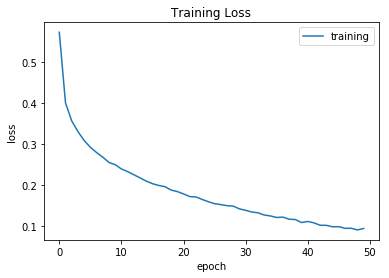

In [11]:
plt.plot(model.history.history['loss'])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['training'], loc='best')
plt.show()

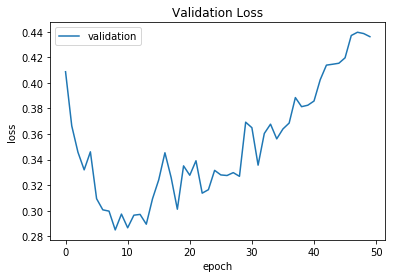

In [12]:
plt.plot(model.history.history['val_loss'])
plt.title("Validation Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['validation'], loc='best')
plt.show()

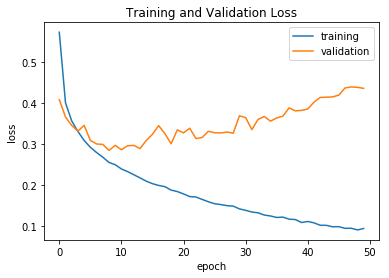

In [13]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Training and Validation Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc='best')
plt.show()

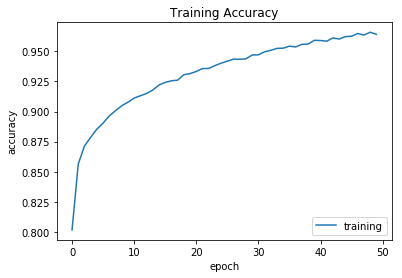

In [14]:
plt.plot(model.history.history['acc'])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['training'], loc='lower right')
plt.show()

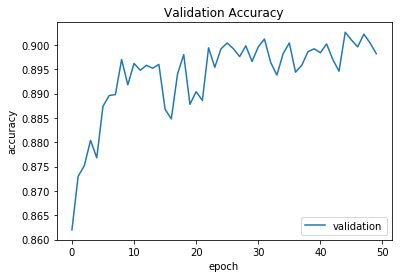

In [15]:
plt.plot(model.history.history['val_acc'])
plt.title("Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['validation'], loc='lower right')
plt.show()

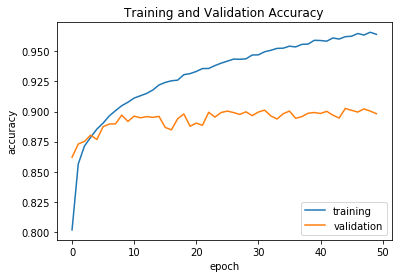

In [16]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Training and Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

## Part 3

Import the required files and data

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# x_train shape: (60000, 28, 28) y_train shape: (60000,)

Normalize the data

In [0]:
x_train = x_train/255
x_test = x_test/255

Split the training data(60000) into training(55000) and validatio(5000)


In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
# print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)

# Print the number of training, validation, and test datasets
# print(x_train.shape[0], 'train set')
# 55000 train set
# print(x_valid.shape[0], 'validation set')
# 5000 validation set
# print(x_test.shape[0], 'test set')
# 10000 test set

In [20]:
# Defining the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

Compile the model
Compile method receives three arguments:

*   A loss function
*   An optimizer
*   A list of metrics

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Train the model

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_valid, y_valid), callbacks=[checkpointer])

Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/50
54976/55000 [============================>.] - ETA: 0s - loss: 0.6162 - acc: 0.7717
Epoch 00001: val_loss improved from inf to 0.38087, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 71s 1ms/sample - loss: 0.6161 - acc: 0.7718 - val_loss: 0.3809 - val_acc: 0.8654
Epoch 2/50
54976/55000 [============================>.] - ETA: 0s - loss: 0.4251 - acc: 0.8457
Epoch 00002: val_loss improved from 0.38087 to 0.33483, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 70s 1ms/sample - loss: 0.4251 - acc: 0.8457 - val_loss: 0.3348 - val_acc: 0.8766
Epoch 3/50
54976/55000 [============================>.] - ETA: 0s - loss: 0.3803 - acc: 0.8605
Epoch 00003: val_loss improved from 0.33483 to 0.31399, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 70s 1ms/sample - loss: 0.3802 - acc: 0.8605 - val_loss: 0.3140 - val_acc: 0.883

Load Model with the best validation accuracy

In [1]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

NameError: ignored

Test Accuracy

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

In [0]:
print(model.history.history.keys())

In [0]:
plt.plot(model.history.history['loss'])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['training'], loc='best')
plt.show()

In [0]:
plt.plot(model.history.history['val_loss'])
plt.title("Validation Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['validation'], loc='best')
plt.show()

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Training and Validation Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [0]:
plt.plot(model.history.history['acc'])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['training'], loc='lower right')
plt.show()

In [0]:
plt.plot(model.history.history['val_acc'])
plt.title("Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['validation'], loc='lower right')
plt.show()

In [0]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Training and Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['training', 'validation'], loc='lower right')
plt.show()